## Importing the Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

## Loading the Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Copy the original training set
original_train_df = train_df.copy()

## EDA and Feature Engineering

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Feature that tells us whether the passenger has a cabin or not
for dataset in [train_df, test_df]:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [9]:
# Create new feature that combines SibSp and Parch
for dataset in [train_df, test_df]:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [10]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [11]:
# Creating a feature called Is_Alone from the Family_Size feature
for dataset in [train_df, test_df]:
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Is_Alone'] = 1

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,1


#### Dealing with Missing Values

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
Family_Size      0
Is_Alone         0
dtype: int64

In [14]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Has_Cabin        0
Family_Size      0
Is_Alone         0
dtype: int64

In [15]:
# Dealing with Embarked feature
train_df['Embarked'].value_counts().reset_index()

,index,Embarked
0,S,644
1,C,168
2,Q,77


In [16]:
(train_df['Embarked'].value_counts() / len(train_df) * 100).reset_index()

,index,Embarked
0,S,72.278339
1,C,18.855219
2,Q,8.641975


In [17]:
train_df['Embarked'] = train_df['Embarked'].apply(lambda x: 'S' if pd.isna(x) else x)

In [18]:
train_df['Embarked'].isnull().sum()

0

In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,1


In [20]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [21]:
# Dealing with missing values in the Age feature
for dataset in [train_df, test_df]:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

#### Creating a new feature called 'Title'

In [22]:
train_df['Name'].apply(lambda x: x.split(' ')[1]).value_counts().reset_index()['index']

0              Mr.
1            Miss.
2             Mrs.
3          Master.
4              Dr.
5             Rev.
6                y
7          Planke,
8            Impe,
9          Gordon,
10            Col.
11           Mlle.
12          Major.
13      Melkebeke,
14       Jonkheer.
15         Shawah,
16             the
17          Velde,
18           Capt.
19    Messemaeker,
20          Carlo,
21             Ms.
22            Mme.
23          Steen,
24         Mulder,
25     Pelsmaeker,
26          Walle,
27             der
28       Billiard,
29            Don.
30       Cruyssen,
Name: index, dtype: object

In [23]:
titles = train_df['Name'].apply(lambda x: x.split(' ')[1]).value_counts().reset_index()['index']

In [24]:
valid_titles = []
for title in titles.values:
    if title[-1] == '.':
        valid_titles.append(title)

In [25]:
valid_titles

['Mr.',
 'Miss.',
 'Mrs.',
 'Master.',
 'Dr.',
 'Rev.',
 'Col.',
 'Mlle.',
 'Major.',
 'Jonkheer.',
 'Capt.',
 'Ms.',
 'Mme.',
 'Don.']

In [26]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(' ')[1] if x.split(' ')[1] in valid_titles else '')
    
    dataset['Title'] = dataset['Title'].replace('Mlle.', 'Miss.')
    dataset['Title'] = dataset['Title'].replace('Ms.', 'Miss.')
    dataset['Title'] = dataset['Title'].replace('Mme.', 'Mrs.')

In [27]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,2,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,2,0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1,1,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,0,1,1,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,1,1,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,40,1,2,W./C. 6607,23.4500,NaN,S,0,4,0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,1,1,Mr.


#### Label Encoding the Data

In [28]:
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
    
    title_mapping = {'': 0, 'Mr.': 1, 'Master.': 2, 'Mrs.': 3, 'Miss.': 4}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

In [29]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Is_Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,0,2,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,1,2,0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,0,1,1,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,1,2,0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1,0,0,211536,1,NaN,0,0,1,1,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,2,B42,0,1,1,1,4.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,1,2,W./C. 6607,2,NaN,0,0,4,0,4.0
889,890,1,1,"Behr, Mr. Karl Howell",0,1,0,0,111369,2,C148,1,1,1,1,1.0


In [30]:
train_df.Title.value_counts()

1.0    502
4.0    182
3.0    122
2.0     40
0.0     25
Name: Title, dtype: int64

In [31]:
# Drop columns no longer need
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

In [32]:
train_df

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,Family_Size,Is_Alone,Title
0,0,3,0,1,0,0,0,0,2,0,1.0
1,1,1,1,2,0,3,1,1,2,0,3.0
2,1,3,1,1,0,1,0,0,1,1,4.0
3,1,1,1,2,0,3,0,1,2,0,3.0
4,0,3,0,2,0,1,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,1,0,0,1,1,NaN
887,1,1,1,1,0,2,0,1,1,1,4.0
888,0,3,1,2,2,2,0,0,4,0,4.0
889,1,1,0,1,0,2,1,1,1,1,1.0


#### Visualising the processed data

In [33]:
train_df.sample(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,Family_Size,Is_Alone,Title
826,0,3,0,0,0,3,0,0,1,1,1.0
234,0,2,0,1,0,1,0,0,1,1,1.0
411,0,3,0,1,0,0,2,0,1,1,1.0
50,0,3,0,0,1,3,0,0,6,0,2.0
689,1,1,1,0,1,3,0,1,2,0,4.0


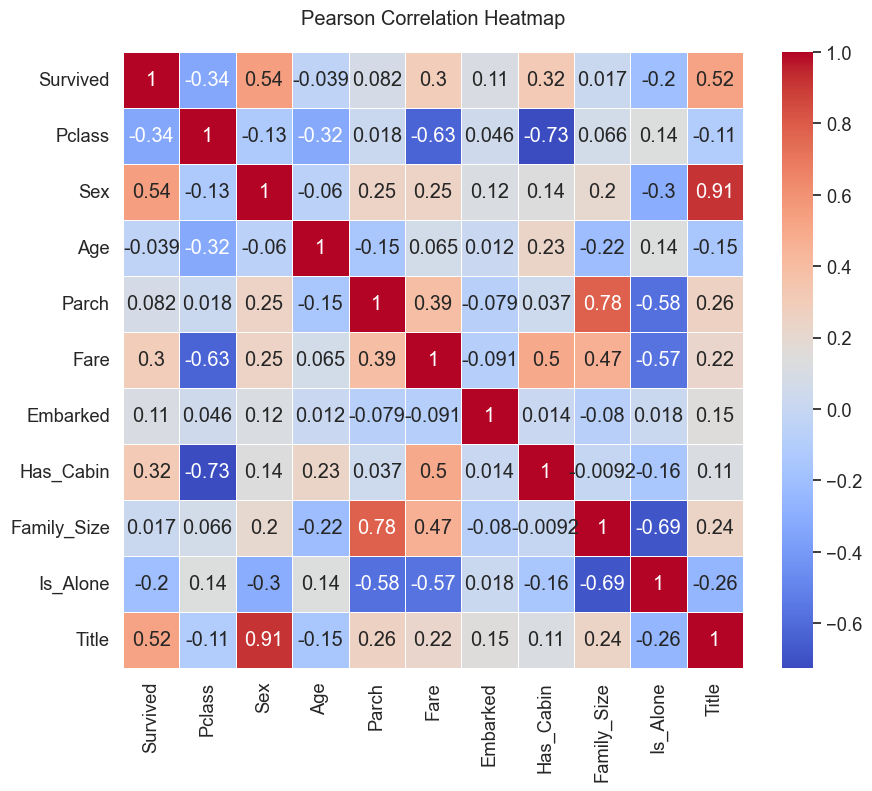

In [34]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
heatmap = sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", linewidths=.5)
heatmap.set_title("Pearson Correlation Heatmap", pad=20)
plt.show()

#### Title vs Sex

In [35]:
train_df[['Title', 'Survived']].groupby('Title').agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
Title                     
0.0    0.320000    25    8
1.0    0.157371   502   79
2.0    0.575000    40   23
3.0    0.803279   122   98
4.0    0.708791   182  129

In [36]:
len(train_df.query('Title == 0')['Survived'])

25

In [37]:
train_df.query('Title == 0')['Survived'].count()

25

In [38]:
train_df[['Sex', 'Survived']].groupby('Sex').agg(['mean', 'count', 'sum'])

Survived           
         mean count  sum
Sex                     
0    0.188908   577  109
1    0.742038   314  233

In [39]:
title_and_sex = original_train_df.copy()[['Name', 'Sex']]

In [40]:
title_and_sex['Title'] = title_and_sex['Name'].apply(lambda x: x.split(' ')[1] if x.split(' ')[1] in valid_titles else '')
    
title_and_sex['Title'] = title_and_sex['Title'].replace('Mlle', 'Miss')
title_and_sex['Title'] = title_and_sex['Title'].replace('Ms', 'Miss')
title_and_sex['Title'] = title_and_sex['Title'].replace('Mme', 'Mrs')

In [41]:
title_and_sex

,Name,Sex,Title
0,"Braund, Mr. Owen Harris",male,Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Mrs.
2,"Heikkinen, Miss. Laina",female,Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Mrs.
4,"Allen, Mr. William Henry",male,Mr.
...,...,...,...
886,"Montvila, Rev. Juozas",male,Rev.
887,"Graham, Miss. Margaret Edith",female,Miss.
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,Miss.
889,"Behr, Mr. Karl Howell",male,Mr.


In [42]:
title_and_sex['Sex'] = title_and_sex['Sex'].map({'male':0, 'female':1}).astype(int)

In [43]:
title_and_sex[['Title', 'Sex']].groupby('Title').agg(['mean', 'count', 'sum'])

Sex           
               mean count  sum
Title                         
           0.360000    25    9
Capt.      0.000000     1    0
Col.       0.000000     2    0
Don.       0.000000     1    0
Dr.        0.142857     7    1
Jonkheer.  0.000000     1    0
Major.     0.000000     2    0
Master.    0.000000    40    0
Miss.      1.000000   179  179
Mlle.      1.000000     2    2
Mme.       1.000000     1    1
Mr.        0.000000   502    0
Mrs.       1.000000   121  121
Ms.        1.000000     1    1
Rev.       0.000000     6    0

In [44]:
title_and_sex[['Title', 'Sex']].groupby('Title').agg(['mean', 'count', 'sum'])

Sex           
               mean count  sum
Title                         
           0.360000    25    9
Capt.      0.000000     1    0
Col.       0.000000     2    0
Don.       0.000000     1    0
Dr.        0.142857     7    1
Jonkheer.  0.000000     1    0
Major.     0.000000     2    0
Master.    0.000000    40    0
Miss.      1.000000   179  179
Mlle.      1.000000     2    2
Mme.       1.000000     1    1
Mr.        0.000000   502    0
Mrs.       1.000000   121  121
Ms.        1.000000     1    1
Rev.       0.000000     6    0

#### Splitting features and label

In [47]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked',
       'Has_Cabin', 'Family_Size', 'Is_Alone', 'Title'],
      dtype='object')

In [55]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin',
       'Family_Size', 'Is_Alone', 'Title'],
      dtype='object')

In [65]:
X_train = train_df.dropna().drop(columns=['Survived'])
y_train = train_df.dropna()['Survived']

In [66]:
type(train_df.columns)

pandas.core.indexes.base.Index

#### Cross Validation

In [67]:
max_depth_range = range(1, len(train_df.dropna().columns))

mean_accuracies = []

for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth=depth)
    
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=10)  # 10-fold cross-validation
    mean_accuracy = np.mean(cross_val_scores)
    mean_accuracies.append(mean_accuracy)

best_depth = max_depth_range[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)

print("Best Depth:", best_depth)
print("Corresponding Accuracy:", best_accuracy)

Best Depth: 3
Corresponding Accuracy: 0.8346394984326018


#### Final Model

In [68]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
# Accuracy score on the training set
accuracy_score(y_train, decision_tree.predict(X_train))

0.8346727898966705

In [74]:
# Predictions for test set
X_test = test_df
y_test_pred = decision_tree.predict(X_test.dropna().values)

C:\Users\anupa\.android\trial\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
